In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('Salary_dataset.csv')
data.head()


,Name,YearsExperience,Salary
0,A,1.2,39500.0
1,B,1.4,46200.0
2,C,1.6,37750.0
3,D,2.1,43520.0
4,E,2.3,39800.0


In [32]:
x = data[['YearsExperience']].values # Feature
y = data['Salary'].values # Target variable


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)
regres = LinearRegression()
regres.fit(X_train, y_train)
y_pred = np.round(regres.predict(X_test), 2)


In [43]:
y_pred


array([ 74595.76,  91021.32,  61820.32,  80983.48,  67295.5 ,  88283.73,
       112922.08,  44482.22, 105439.32,  98321.57])

In [44]:
y_test

array([ 83000.,  98200.,  63200.,  93940.,  61111.,  91700., 116900.,
        43520., 109400., 101300.])

In [45]:
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 92.0%


In [51]:
year=int(input("Enter the year of experience to predict salary : "))
print(f"The predicted salary for given {year} years : ",np.round(regres.predict([[year]]),2))

print(f"Regression Coefficient: {regres.coef_[0]:.2f}")
print(f"Intercept : {regres.intercept_:.2f}")


Enter the year of experience to predict salary :  10


The predicted salary for given 10 years :  [116572.2]
Regression Coefficient: 9125.31
Intercept : 25319.06


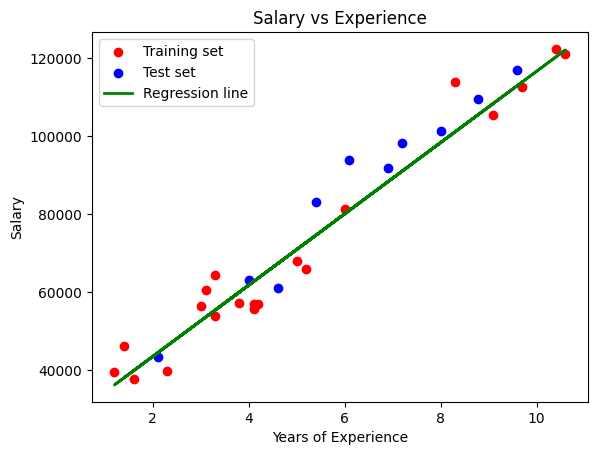

In [52]:
# Visualizing both Training and Test set results on a single plot
plt.scatter(X_train, y_train, color='red', label='Training set')
plt.scatter(X_test, y_test, color='blue', label='Test set')
plt.plot(X_train, regres.predict(X_train), color='green', linewidth=2, label='Regression line')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()